<a href="https://colab.research.google.com/github/nikenaml/news-classification-nlp-neural-network/blob/master/Github_News_Classification_(EDA_Deep_Cleansing_Tensorflow_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Nama     : Niken Amelia
    Email    : niken.aml99@gmail.com
    No. HP   : 085311321124
    LinkedIn : https://www.linkedin.com/in/nikenamelia/
    Github   : https://github.com/nikenaml

# AG News Classification Dataset

### Description
The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. 

Consists of class ids 1-4 where 
- 1-World
- 2-Sports 
- 3-Business 
- 4-Sci/Tech

https://www.kaggle.com/amananandrai/ag-news-classification-dataset

## Download dataset from Kaggle

In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikenamelia","key":"d81f627b9699f95aa938e378544c3488"}'}

In [ ]:
# create a kaggle folder
! mkdir ~/.kaggle

# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d amananandrai/ag-news-classification-dataset

 44% 5.00M/11.4M [00:00<00:00, 44.4MB/s]
100% 11.4M/11.4M [00:00<00:00, 55.7MB/s]


In [ ]:
#unzip
!mkdir dataset
!unzip ag-news-classification-dataset.zip -d dataset
!ls dataset

Archive:  ag-news-classification-dataset.zip
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       
test.csv  train.csv


In [ ]:
# join data

from glob import glob

filename = 'dataset_news.csv'

with open(filename, 'a') as singleFile:
    first_csv = True
    for csv in glob('./dataset/*.csv'):
        if csv == filename:
            pass
        else:
            header = True
            for line in open(csv, 'r'):
                if first_csv and header:
                    singleFile.write(line)
                    first_csv = False
                    header = False
                elif header:
                    header = False
                else:
                    singleFile.write(line)
    singleFile.close()

### Import Packages

In [ ]:
import numpy as np
import pandas as pd
import re
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 2000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


### Load Data

In [ ]:
data = pd.read_csv("dataset_news.csv")
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


## Data Understanding

### EDA

In [ ]:
# total data
data.shape

(127600, 3)

In [ ]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
# categories
data['Class Index'].value_counts()

4    31900
3    31900
2    31900
1    31900
Name: Class Index, dtype: int64

## Data Preparation



In [ ]:
# join columns
data['news'] = data['Title'] + ' ' + data['Description']

# rename columns
data = data.rename(columns = {'Class Index': 'category'}, inplace = False)
data.head()

,category,Title,Description,news
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.","Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.","Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.","Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [ ]:
# delete columns (unused column)
data = data.drop(data.columns[[1, 2]], axis=1)
data.head()

,category,news
0,3,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


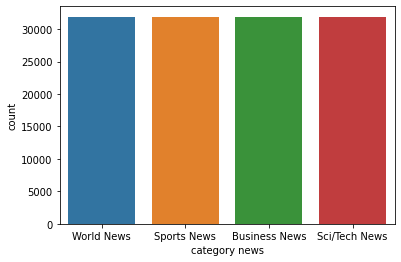

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# define labels
labels = ['World News', 'Sports News', 'Business News', 'Sci/Tech News']

ax = sns.countplot(data.category)
plt.xlabel('category news')
ax.set_xticklabels(labels);

## Data Cleaning

In [ ]:
# removing punctuation down character
def removePunctuationDown(strs):
    remove = '!#$%&\()+,-./:;<=>?@[\\]_{|}~'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, " ", strs)
    return h

# removing punctuation up character
def removePunctuationUp(strs):
    remove = ',"\^`*'
    # remove = ',"\'^`*'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, "", strs)
    return h

# replace other special character
def replace(strs):
    strs = strs.replace('\\t',' ').replace('\\n',' ').replace('\\u',' ').replace('\\',' ')
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t','')
    strs = strs.encode('utf-8').decode('ascii', 'ignore')
    return strs

# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                               #convert data input to Unicode
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Apply Cleaning Data
data['news'] = [i.lower() for i in data.news] #lower case
data['remove_emoji'] = data['news'].apply(remove_emoji) #remov emoji
data['hastags'] = [re.findall(r'\B#\w*[a-zA-Z0-9]+\w*', i) for i in data.remove_emoji] #save hastags
data['remove_email'] = [re.sub(r'\S*@\S*\s?','',i) for i in data.remove_emoji] #remove email
data['remove_hashtag'] = [re.sub("#[A-Za-z0-9_]+",'',i) for i in data.remove_emoji] #remove hastags
data['remove_special_character'] = data['remove_hashtag'].replace(r'http\s+|www.\s+','',regex=True).replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #remove link
data['remove_special_character'] = [re.sub(r'&lt;/?[a-z]+&gt;','',i) for i in data.remove_special_character] #remove_special_character
data['remove_special_character'] = [re.sub('<.*?>+', '', i) for i in data.remove_special_character] #remove special character
data['text_clean'] = [removePunctuationDown(i) for i in data.remove_special_character] #remove punc down
data['text_clean'] = [removePunctuationUp(i) for i in data.text_clean] #remove punc up
data['text_clean'] = [replace(j) for j in data.text_clean] #remove \n \t

In [ ]:
data.tail()

,category,news,remove_emoji,hastags,remove_email,remove_hashtag,remove_special_character,text_clean
127595,1,"around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin, which is contained in agent orange, a scientist who analyzed his blood said friday.","around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin, which is contained in agent orange, a scientist who analyzed his blood said friday.",[],"around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin, which is contained in agent orange, a scientist who analyzed his blood said friday.","around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin, which is contained in agent orange, a scientist who analyzed his blood said friday.","around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin, which is contained in agent orange, a scientist who analyzed his blood said friday.",around the world ukrainian presidential candidate viktor yushchenko was poisoned with the most harmful known dioxin which is contained in agent orange a scientist who analyzed his blood said friday
127596,2,"void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets, missed on tim hudson, and are resigned to randy johnson becoming a yankee -- the red sox struck again last night, coming to terms with free agent matt clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...","void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets, missed on tim hudson, and are resigned to randy johnson becoming a yankee -- the red sox struck again last night, coming to terms with free agent matt clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...",[],"void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets, missed on tim hudson, and are resigned to randy johnson becoming a yankee -- the red sox struck again last night, coming to terms with free agent matt clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...","void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets, missed on tim hudson, and are resigned to randy johnson becoming a yankee -- the red sox struck again last night, coming to terms with free agent matt clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...","void is filled with clement with the supply of attractive pitching options dwindling daily -- they lost pedro martinez to the mets, missed on tim hudson, and are resigned to randy johnson becoming a yankee -- the red sox struck again last night, coming to terms with free agent matt clement on a three-year deal that will pay the righthander in the neighborhood of \$25 ...",void is filled with clement with the supply of attractive pitching options dwindling daily they lost pedro martinez to the mets missed on tim hudson and are resigned to randy johnson becoming a yankee the red sox struck again last night coming to terms with free agent matt clement on a three year deal that will pay the righthander in the neighborhood of 25
127597,2,"martinez leaves bitter like roger clemens did almost exactly eight years earlier, pedro martinez has left the red sox apparently bitter about the way he was treated by management.","martinez leaves bitter like roger clemens did almost exactly eight years earlier, pedro martinez has left the red sox apparently bitter about the way he was treated by management.",[],"martinez leaves bitter like roger clemens did a

### Custom Cleansing Data

Custom for remove specific word

In [ ]:
def text_clean(text):    
    ## Decontract text            
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\’", "\'", text)
    
    # remove all puctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove digit/number
    
    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)
    
    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

data['text_clean'] = data['text_clean'].apply(lambda x: text_clean(x))

In [ ]:
data.head()

,category,news,remove_emoji,hastags,remove_email,remove_hashtag,remove_special_character,text_clean
0,3,"wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.","wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.",[],"wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.","wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.","wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.",wall st bears claw back into the black reuters reuters short sellers wall street is dwindling band of ultra cynics are seeing green again
1,3,"carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",[],"carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.","carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",carlyle looks toward commercial aerospace reuters reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market
2,3,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,[],oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks outlook reuters reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums
3,3,"iraq

## Data Preprocessing

In [ ]:
# select columns
data = data[['news', 'text_clean', 'category']]
data.head()

,news,text_clean,category
0,"wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.",wall st bears claw back into the black reuters reuters short sellers wall street is dwindling band of ultra cynics are seeing green again,3
1,"carlyle looks toward commercial aerospace (reuters) reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",carlyle looks toward commercial aerospace reuters reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,3
2,oil and economy cloud stocks' outlook (reuters) reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,oil and economy cloud stocks outlook reuters reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums,3
3,"iraq halts oil exports from main southern pipeline (reuters) reuters - authorities have halted oil export\flows from the main pipeline in southern iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on saturday.",iraq halts oil exports from main southern pipeline reuters reuters authorities have halted oil export flows from the main pipeline in southern iraq after intelligence showed a rebel militia could strike infrastructure an oil official said on saturday,3
4,"oil prices soar to all-time record, posing new menace to us economy (afp) afp - tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the us presidential elections.",oil prices soar to all time record posing new menace to us economy afp afp tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections,3


### Lemmatization

In [ ]:
# import and download packages
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# import library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

# define tag and lemmatization function
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# lemmatizing
data['text_lemma'] = data['text_clean'].apply(lambda x: lemmatize_sentence(x))

data = data[['text_clean','text_lemma','category']]
data.head()

,text_clean,text_lemma,category
0,wall st bears claw back into the black reuters reuters short sellers wall street is dwindling band of ultra cynics are seeing green again,wall st bear claw back into the black reuters reuters short seller wall street be dwindle band of ultra cynic be see green again,3
1,carlyle looks toward commercial aerospace reuters reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group which have a reputation for make well time and occasionally controversial play in the defense industry have quietly place its bet on another part of the market,3
2,oil and economy cloud stocks outlook reuters reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums,oil and economy cloud stock outlook reuters reuters soar crude price plus worry about the economy and the outlook for earnings be expect to hang over the stock market next week during the depth of the summer doldrums,3
3,iraq halts oil exports from main southern pipeline reuters reuters authorities have halted oil export flows from the main pipeline in southern iraq after intelligence showed a rebel militia could strike infrastructure an oil official said on saturday,iraq halt oil export from main southern pipeline reuters reuters authority have halt oil export flow from the main pipeline in southern iraq after intelligence show a rebel militia could strike infrastructure an oil official say on saturday,3
4,oil prices soar to all time record posing new menace to us economy afp afp tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections,oil price soar to all time record pose new menace to us economy afp afp tearaway world oil price toppling record and strain wallet present a new economic menace barely three month before the us presidential election,3


### Stopword

In [ ]:
stop = stopwords.words('english')

data['text_preprocess'] = data['text_lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,text_clean,text_lemma,category,text_preprocess
0,wall st bears claw back into the black reuters reuters short sellers wall street is dwindling band of ultra cynics are seeing green again,wall st bear claw back into the black reuters reuters short seller wall street be dwindle band of ultra cynic be see green again,3,wall st bear claw back black reuters reuters short seller wall street dwindle band ultra cynic see green
1,carlyle looks toward commercial aerospace reuters reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group which have a reputation for make well time and occasionally controversial play in the defense industry have quietly place its bet on another part of the market,3,carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group reputation make well time occasionally controversial play defense industry quietly place bet another part market
2,oil and economy cloud stocks outlook reuters reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums,oil and economy cloud stock outlook reuters reuters soar crude price plus worry about the economy and the outlook for earnings be expect to hang over the stock market next week during the depth of the summer doldrums,3,oil economy cloud stock outlook reuters reuters soar crude price plus worry economy outlook earnings expect hang stock market next week depth summer doldrums
3,iraq halts oil exports from main southern pipeline reuters reuters authorities have halted oil export flows from the main pipeline in southern iraq after intelligence showed a rebel militia could strike infrastructure an oil official said on saturday,iraq halt oil export from main southern pipeline reuters reuters authority have halt oil export flow from the main pipeline in southern iraq after intelligence show a rebel militia could strike infrastructure an oil official say on saturday,3,iraq halt oil export main southern pipeline reuters reuters authority halt oil export flow main pipeline southern iraq intelligence show rebel militia could strike infrastructure oil official say saturday
4,oil prices soar to all time record posing new menace to us economy afp afp tearaway world oil prices toppling records and straining wallets present a new economic menace barely three months before the us presidential elections,oil price soar to all time record pose new menace to us economy afp afp tearaway world oil price toppling record and strain wallet present a new economic menace barely three month before the us presidential election,3,oil price soar time record pose new menace us economy afp afp tearaway world oil price toppling record strain wallet present new economic menace barely three month us presidential election


## Data Process

In [ ]:
#convert dataframe to values
data_process = data['text_preprocess'].values
label = data['category'].apply(lambda x:x-1).values

In [ ]:
# view data array
data_process[0:10]

array(['wall st bear claw back black reuters reuters short seller wall street dwindle band ultra cynic see green',
       'carlyle look toward commercial aerospace reuters reuters private investment firm carlyle group reputation make well time occasionally controversial play defense industry quietly place bet another part market',
       'oil economy cloud stock outlook reuters reuters soar crude price plus worry economy outlook earnings expect hang stock market next week depth summer doldrums',
       'iraq halt oil export main southern pipeline reuters reuters authority halt oil export flow main pipeline southern iraq intelligence show rebel militia could strike infrastructure oil official say saturday',
       'oil price soar time record pose new menace us economy afp afp tearaway world oil price toppling record strain wallet present new economic menace barely three month us presidential election',
       'stock end near year low reuters reuters stock end slightly high friday stay n

In [ ]:
# view label array
label

array([2, 2, 2, ..., 1, 2, 2])

### Data Splitting

In [ ]:
# split data into training and validation

from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(data_process, label, test_size=0.2, shuffle=True,  stratify=label, random_state=42)

text_train.shape, text_test.shape, label_train.shape, label_test.shape

((102080,), (25520,), (102080,), (25520,))

## Model

In [ ]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)

word_index = tokenizer.word_index
total_words = len(word_index)+1
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=100) 
padded_test = pad_sequences(sekuens_test, maxlen=100)

In [ ]:
print(f'train datashape : {padded_train.shape}')
print(f'test datashape : {padded_test.shape}')
total_words

train datashape : (102080, 100)
test datashape : (25520, 100)


54643

In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          6994304   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [ ]:
# callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

In [ ]:
import time
time_array = []

start_time = time.time()

# model fit
history = model.fit(padded_train, label_train, 
                    batch_size=256, 
                    epochs=30, 
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/30
25/25 - 20s - loss: 1.3371 - accuracy: 0.4103 - val_loss: 1.1696 - val_accuracy: 0.6594
Epoch 2/30
25/25 - 18s - loss: 0.7246 - accuracy: 0.7727 - val_loss: 0.4737 - val_accuracy: 0.8602
Epoch 3/30
25/25 - 18s - loss: 0.4100 - accuracy: 0.8734 - val_loss: 0.3904 - val_accuracy: 0.8758
Epoch 4/30
25/25 - 18s - loss: 0.3640 - accuracy: 0.8867 - val_loss: 0.3713 - val_accuracy: 0.8852
Epoch 5/30
25/25 - 18s - loss: 0.3599 - accuracy: 0.8938 - val_loss: 0.3558 - val_accuracy: 0.8898
Epoch 6/30
25/25 - 18s - loss: 0.3295 - accuracy: 0.8950 - val_loss: 0.3232 - val_accuracy: 0.8984
Epoch 7/30
25/25 - 18s - loss: 0.3084 - accuracy: 0.9031 - val_loss: 0.3206 - val_accuracy: 0.8945
Epoch 8/30
25/25 - 18s - loss: 0.3103 - accuracy: 0.9023 - val_loss: 0.3024 - val_accuracy: 0.8984
Epoch 9/30
25/25 - 18s - loss: 0.2935 - accuracy: 0.9056 - val_loss: 0.3053 - val_accuracy: 0.9000
Epoch 10/30
25/25 - 18s - loss: 0.2957 - accuracy: 0.9025 - val_loss: 0.3036 - val_accuracy: 0.9000
Epoch 11/

## Plot Visualization Accuracy and Loss Each Epoch


In [ ]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.93
Training Loss: 0.22
Validation Accuracy: 0.91
Validation Loss: 0.28




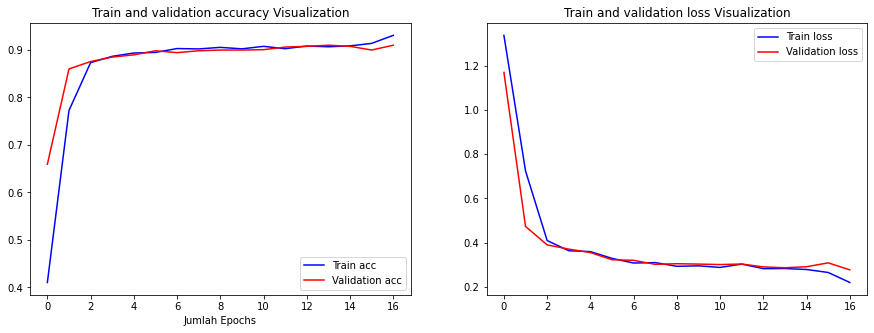

In [ ]:
plot_history(history)